# Praca domowa 6

## Zadanie 1


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("house_data.csv")

1. Jaka jest średnia cena nieruchomości położonych nad wodą, których jakoś wykończenia jest równa lub większa od mediany jakości wykończenia?


In [11]:
df[(df["grade"] >= df["grade"].median()) & df["waterfront"]]["price"].mean()

1784151.7006802722

Odp: 1784151.7006802722

2. Czy nieruchomości o 2 piętrach mają większą (w oparciu o wartości mediany) liczbę łazienek niż nieruchomości o 3 piętrach?


In [15]:
df[df["floors"] == 2]["bathrooms"].median() > df[df["floors"] == 3]["bathrooms"].median()

False

Odp: Nieprawda, nieruchomości o dwóch piętrach nie mają większej liczby łazienek.

3. Jak wygląda wartość kwartyla 0.25 oraz 0.75 jakości wykończenia nieruchomości położonych na północy biorąc pod uwagę czy ma ona widok na wodę czy nie ma?

In [84]:
df[df["lat"] > (df["lat"].max() + df["lat"].min())/2].groupby("waterfront")["grade"].quantile([0.25, 0.75])

waterfront      
0           0.25     7.0
            0.75     8.0
1           0.25     8.0
            0.75    10.0
Name: grade, dtype: float64

Odp: Dla nieruchomości położonych nie przy wodzie wartości kwantyli wynoszą odpowiednio 7.0 oraz 8.0,
a dla nieruchomości połżonych przy wodzie: 8.0 oraz 10.0

4. Pod którym kodem pocztowy jest położonych najwięcej nieruchomości i jaki jest rozstęp miedzykwartylowy dla ceny nieruchomości położonych pod tym adresem?

In [39]:
df.groupby("zipcode").aggregate("count").sort_values("id") # 98103
df[df["zipcode"] == 98103]["price"].quantile([0.25, 0.75]) # 695000.0, 432125.0 
iqr = 695000.0 - 432125.0
iqr

262875.0

Odp: Rozstęp międzykwartylowy wynosi 262875.0

5. Ile procent nieruchomości ma wyższą średnią powierzchnię 15 najbliższych sąsiadów względem swojej powierzchni?

In [43]:
sum(df["sqft_living15"] > df["sqft_living"]) / df.size * 100

2.0283206976400887

Odp: Około 2% nieruchomości ma wyższą średnią powierzchnię 15 najbliższych sąsiadów względem swojej powierzchni.

 6. O ile procent więcej jest nieruchomości leżcych na północy zachód niż  nieruchomości leżących na południowy wschód?

In [96]:
# ten punkt przyjmujemy jako środek
(df["lat"].max() + df["lat"].min())/2, (df["long"].max() + df["long"].min())/2

NW = df[(df["lat"] > (df["lat"].max() + df["lat"].min())/2) & (df["long"] < (df["long"].max() + df["long"].min())/2)].count()["id"]
SE = df[(df["lat"] < (df["lat"].max() + df["lat"].min())/2) & (df["long"] > (df["long"].max() + df["long"].min())/2)].count()["id"]

NW / SE


184.43529411764706

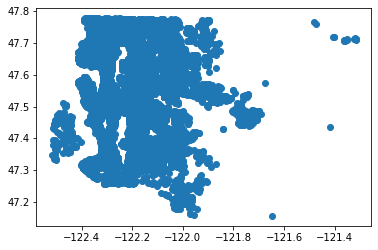

In [95]:
plt.scatter(df["long"], df["lat"])

Odp: Nieruchomości na północnym zachodzie jest ponad 184 razy więcej, czyli o 18300% więcej niż na południowym wschodzie. Rysunek powyżej pokazuje graficznie, że nie jest to błąd.

# Zadanie 2

Dla wybranej zmiennej ze zbioru danych z Zadania 1 narysuj:

a) rozkład zmiennej jakościowej

b) rozkład zmiennej ilościowej

c) rozkład dwóch zmiennych (dowolna kombinacja jakościowej i ilościowej)

a)

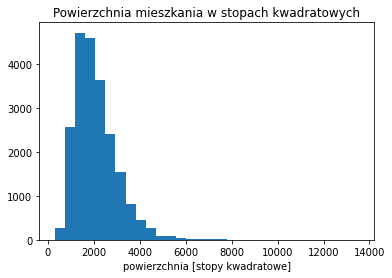

In [78]:
plt.hist(df["sqft_living"],bins=30)
plt.title("Powierzchnia mieszkania w stopach kwadratowych")
plt.xlabel("powierzchnia [stopy kwadratowe]")
plt.show()

b)

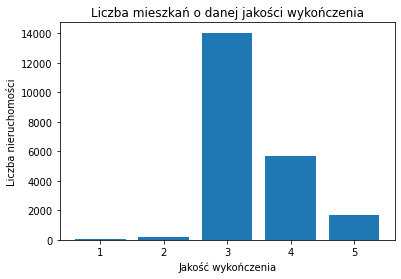

In [80]:
plt.bar([1,2,3,4,5],df.groupby("condition").aggregate("count")["id"])
plt.title("Liczba mieszkań o danej jakości wykończenia")
plt.xlabel("Jakość wykończenia")
plt.ylabel("Liczba nieruchomości")
plt.show()


c)

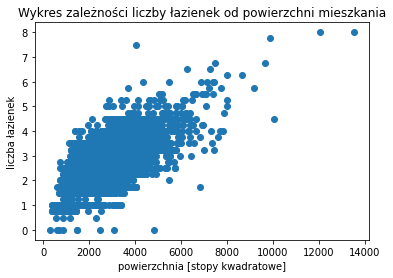

In [76]:
plt.scatter(df["sqft_living"], df["bathrooms"])
plt.title("Wykres zależności liczby łazienek od powierzchni mieszkania")
plt.xlabel("powierzchnia [stopy kwadratowe]")
plt.ylabel("liczba łazienek")
plt.show()